In [1]:
import pandas as pd
path = "/kaggle/input/maunaloadailytemps-dataset/MaunaLoaDailyTemps-1.csv"
df=pd.read_csv(path,index_col='DATE'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1821 entries, 2014-01-01 to 2018-12-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  1821 non-null   float64
 1   MaxTemp  1821 non-null   float64
 2   AvgTemp  1821 non-null   float64
 3   Sunrise  1821 non-null   int64  
 4   Sunset   1821 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.4 KB


<Axes: xlabel='DATE'>

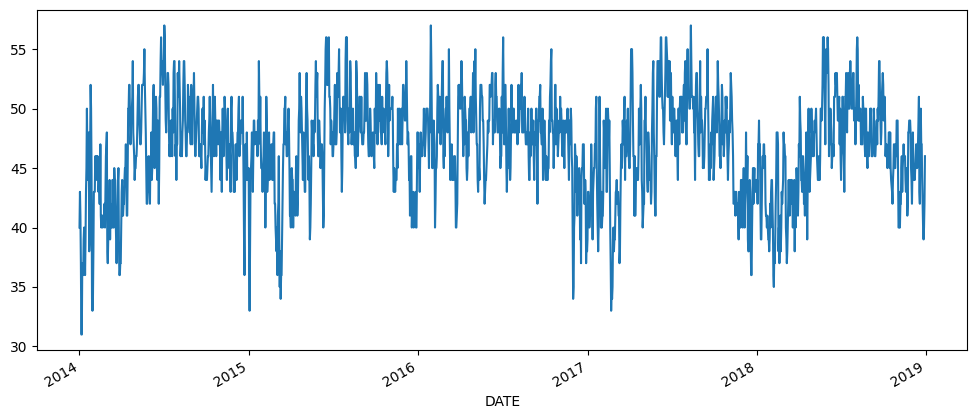

In [3]:
df['AvgTemp'].plot(figsize=(12,5))

In [4]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068781
2. P-Value :  8.67593748019951e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [5]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ec/2b/e7d18360d56396b62781ba4616527af49244d4bed51f0780646fa3953cc8/pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
from pmdarima import auto_arima 
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.217, Time=5.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.59 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.287, Time=2.42 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.571, Time=6.40 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.191, Time=6.70 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.705, Time=7.83 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.313, Time=7.96 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.276, Time=8.92 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8304.928, Time=8.64 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [8]:
from statsmodels.tsa.arima.model import ARIMA

In [9]:
from datetime import datetime,timedelta
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(train.iloc[-1])
print(test.iloc[0],test.iloc[-1])


(1821, 5)
(1791, 5) (30, 5)
MinTemp      38.0
MaxTemp      52.0
AvgTemp      45.0
Sunrise     640.0
Sunset     1742.0
Name: 2018-11-30 00:00:00, dtype: float64
MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


In [10]:
model=ARIMA(df['AvgTemp'],order=(1,0,5))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1821
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4138.130
Date:                Tue, 19 Mar 2024   AIC                           8292.261
Time:                        13:40:15   BIC                           8336.318
Sample:                             0   HQIC                          8308.514
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5284      0.758     61.403      0.000      45.043      48.014
ar.L1          0.9860      0.005    192.909      0.000       0.976       0.996
ma.L1         -0.1403      0.023     -6.125      0.000      -0.185      -0.095
ma.L2         -0.2328      0.023    -10.038      0.000      -0.278      -0.187
ma.L3         -0.2163      0.023     -9.280      0.000      -0.262      -0.171
ma.L4         -0.1478      0.023     -6.542      0.000      -0.192      -0.104
ma.L5         -0.0587      0.024     -2.424      0.015      -0.106      -0.011
sigma2         5.5080      0.173     31.925      0.000       5.170       5.846
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.69
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Actual Average Temperature:
DATE
2018-12-01    44.0
2018-12-02    42.0
2018-12-03    45.0
2018-12-04    48.0
2018-12-05    45.0
2018-12-06    44.0
2018-12-07    45.0
2018-12-08    44.0
2018-12-09    45.0
2018-12-10    46.0
2018-12-11    47.0
2018-12-12    47.0
2018-12-13    45.0
2018-12-14    46.0
2018-12-15    47.0
2018-12-16    49.0
2018-12-17    51.0
2018-12-18    43.0
2018-12-19    42.0
2018-12-20    48.0
2018-12-21    50.0
2018-12-22    47.0
2018-12-23    47.0
2018-12-24    44.0
2018-12-25    42.0
2018-12-26    40.0
2018-12-27    39.0
2018-12-28    40.0
2018-12-29    42.0
2018-12-30    46.0
Name: AvgTemp, dtype: float64

Predicted Average Temperature:
2018-12-01    44.743659
2018-12-02    44.354268
2018-12-03    42.939618
2018-12-04    45.754275
2018-12-05    47.930992
2018-12-06    44.855744
2018-12-07    44.185677
2018-12-08    45.287438
2018-12-09    44.513030
2018-12-10    45.375240
2018-12-11    46.014677
2018-12-12    46.746901
2018-12-13    46.596897
2018-12-14    44.852409

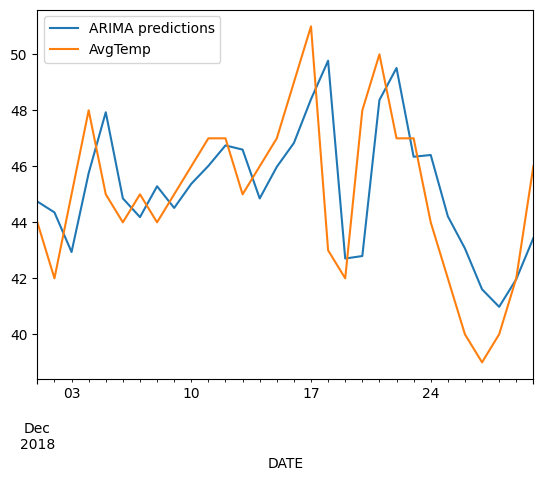

In [11]:
# Define the start and end points for prediction
start = len(train)
end = len(train) + len(test) - 1

# Forecast
pred = model_fit.predict(start=start, end=end, typ='levels').rename('ARIMA predictions')

# If the predicted values don't have date values as index, uncomment the following lines
index_future_dates = pd.date_range(start='2018-12-01', end='2018-12-30')
pred.index = index_future_dates

# Plot the predictions and the actual values
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

# Print the actual and predicted values for comparison
print("Actual Average Temperature:")
print(test['AvgTemp'])
print("\nPredicted Average Temperature:")
print(pred)


In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

2.326315047721701


In [13]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [14]:

index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)
     

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116915
2019-01-04    45.136666
2019-01-05    45.156140
2019-01-06    45.175341
2019-01-07    45.194274
2019-01-08    45.212942
2019-01-09    45.231349
2019-01-10    45.249498
2019-01-11    45.267393
2019-01-12    45.285038
2019-01-13    45.302436
2019-01-14    45.319590
2019-01-15    45.336505
2019-01-16    45.353183
2019-01-17    45.369627
2019-01-18    45.385841
2019-01-19    45.401829
2019-01-20    45.417593
2019-01-21    45.433136
2019-01-22    45.448462
2019-01-23    45.463573
2019-01-24    45.478473
2019-01-25    45.493164
2019-01-26    45.507650
2019-01-27    45.521933
2019-01-28    45.536016
2019-01-29    45.549903
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

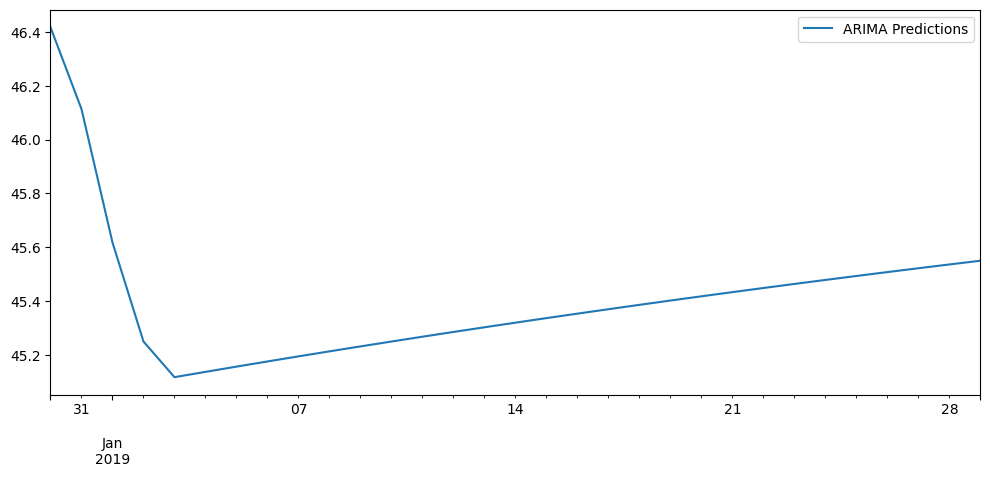

In [15]:
pred.plot(figsize=(12,5),legend=True)



USING TRAIN





In [16]:
model3=ARIMA(train['AvgTemp'],order=(1,0,5))
model3_fit=model3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Tue, 19 Mar 2024   AIC                           8156.395
Time:                        13:40:25   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Actual Average Temperature:
DATE
2018-12-01    44.0
2018-12-02    42.0
2018-12-03    45.0
2018-12-04    48.0
2018-12-05    45.0
2018-12-06    44.0
2018-12-07    45.0
2018-12-08    44.0
2018-12-09    45.0
2018-12-10    46.0
2018-12-11    47.0
2018-12-12    47.0
2018-12-13    45.0
2018-12-14    46.0
2018-12-15    47.0
2018-12-16    49.0
2018-12-17    51.0
2018-12-18    43.0
2018-12-19    42.0
2018-12-20    48.0
2018-12-21    50.0
2018-12-22    47.0
2018-12-23    47.0
2018-12-24    44.0
2018-12-25    42.0
2018-12-26    40.0
2018-12-27    39.0
2018-12-28    40.0
2018-12-29    42.0
2018-12-30    46.0
Name: AvgTemp, dtype: float64

Predicted Average Temperature:
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721545
2018-12-05    45.863733
2018-12-06    45.874126
2018-12-07    45.884370
2018-12-08    45.894466
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923891
2018-12-12    45.933419
2018-12-13    45.942809
2018-12-14    45.952064

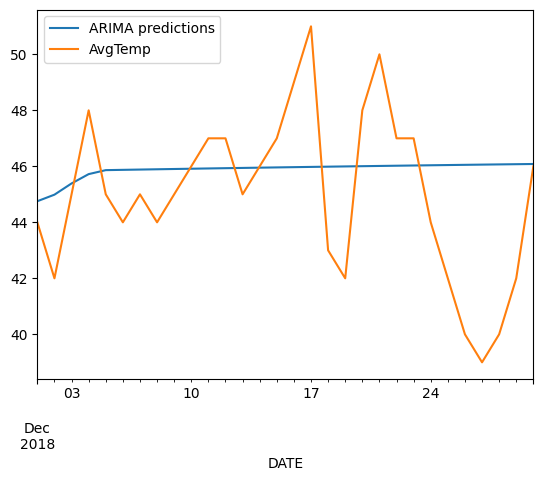

In [17]:
# Define the start and end points for prediction
start = len(train)
end = len(train) + len(test) - 1

# Forecast
pred = model3_fit.predict(start=start, end=end, typ='levels').rename('ARIMA predictions')

# If the predicted values don't have date values as index, uncomment the following lines
index_future_dates = pd.date_range(start='2018-12-01', end='2018-12-30')
pred.index = index_future_dates

# Plot the predictions and the actual values
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

# Print the actual and predicted values for comparison
print("Actual Average Temperature:")
print(test['AvgTemp'])
print("\nPredicted Average Temperature:")
print(pred)

In [18]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model3_fit.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    46.090494
2018-12-31    46.097622
2019-01-01    46.104648
2019-01-02    46.111573
2019-01-03    46.118398
2019-01-04    46.125125
2019-01-05    46.131755
2019-01-06    46.138289
2019-01-07    46.144730
2019-01-08    46.151077
2019-01-09    46.157334
2019-01-10    46.163500
2019-01-11    46.169577
2019-01-12    46.175567
2019-01-13    46.181471
2019-01-14    46.187290
2019-01-15    46.193024
2019-01-16    46.198677
2019-01-17    46.204248
2019-01-18    46.209738
2019-01-19    46.215150
2019-01-20    46.220484
2019-01-21    46.225741
2019-01-22    46.230922
2019-01-23    46.236029
2019-01-24    46.241062
2019-01-25    46.246023
2019-01-26    46.250912
2019-01-27    46.255731
2019-01-28    46.260480
2019-01-29    46.265162
Freq: D, Name: ARIMA Predictions, dtype: float64
